<h1> DISPARITY AND DEPTH MAPS</h1>

<div style="display: flex; align-items: center;">
    <img src="https://img.freepik.com/premium-vector/warning-signs-high-voltage-hazard-isolated-white-background_68708-427.jpg?w=2000" alt="Image Alt Text" width="50" height="50" style="margin-right: 20px;">
    <div style="font-size: 15px;margin-right: 30px">
            Each lab must be completed before the beginning of the other lab session.
        <br>
          <strong>Don't forget to entitle your .ipynb file with your name and surname. <strong>
        <br>
         The final submission of the first module has to be done <strong> by Tuesday 27<sup> th</sup>October before 10 am.</strong>
    </div>
</div>

<table>
      <td style="border-left: 3px solid rgba(114, 147, 203, 0.9); background-color: rgba(114, 147, 203, 0.1); font-size: 15px; color: blakc; padding-left: 30px;">
        Don't forget to legend your figures and graphs. Interpretations are expected and must by short but comprehensive.  
      </td>
</table>

#### Contact : meghna.parameswaran-ayyar@u-bordeaux.fr

<img src="https://docs.opencv.org/3.4/stereo_depth.jpg" width="300" height="300">


There will be two parts to this lab.

1. **Disparity Maps**: Generate the map using stereo (Left & Right) images and OpenCV algorithms
2. **Depth Maps**: Using a Neural Network


The main goals of this lab is to be able to understand how to read library and Git documentation and use pre-existing code for your own images. For the OpenCV functions you are expected to try different parameters to understand how they work and how the choice of stereo images affects the final output.

For the Neural Network we provide two options. But you are welcome to try out anything else you may find and compare the results with one of the given networks.

<H2> OPENCV : Disparity map </h2>

Installing slider

In [ ]:
!pip install jupyter_bokeh
!pip install panel

First, we need to import opencv, numpy and matplotlib libraries ...

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import panel as pn

In [3]:
def normalise(matrix):
    """
    Normalizes a matrix by dividing it by its maximum value.

    Args:
        matrix (numpy.ndarray): The input matrix to be normalized.

    Returns:
        numpy.ndarray: The normalized matrix.
    """
    max_value = np.max(matrix)
    return matrix / max_value

Setting up sliders

In [6]:
pn.extension()

In [7]:
int_slider_disp = pn.widgets.IntSlider(name=f'Number of Disparities as multiples of 16', start=1, end=20, step=1, value=16)
int_slider_disp

IntSlider(end=20, name='Number of Disparities a..., start=1, value=16)

In [8]:
int_slider_block = pn.widgets.IntSlider(name=f'Block Size', start=5, end=51, step=2, value=5)
int_slider_block

IntSlider(end=51, name='Block Size', start=5, step=2, value=5)

Then, we need to have a left and a right image. You have three choices :
- use the provided images
- take a picture placing your phone on your left eye, then another (without moving) on your right eye
- take a stereo image from the internet (using google images). As they are provided as a single SBS image, you will have to cut it into two images.

Import the images using cv2.imread() . Display both using matplotlib.

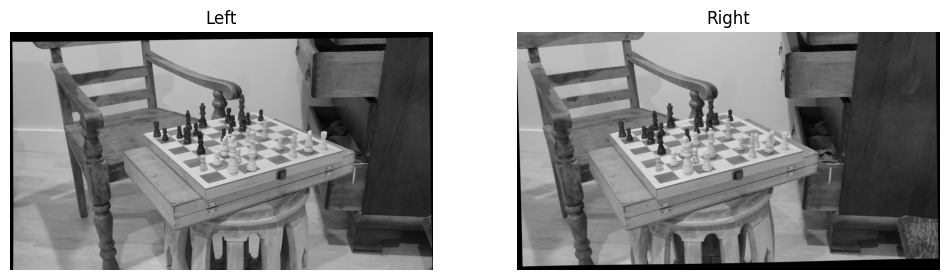

In [5]:
left = cv2.imread('left.png', cv2.IMREAD_GRAYSCALE)
right = cv2.imread('right.png', cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(left, cmap='gray')
plt.title('Left')
plt.axis('off')
plt.subplot(122)
plt.imshow(right, cmap='gray')
plt.title('Right')
plt.axis('off')
plt.show()


Now, we can compute a disparity map using StereoBM or StereoSGBM algorithms. You can choose which one you prefer.
- for StereoBM refer to : https://docs.opencv.org/3.4/dd/d53/tutorial_py_depthmap.html
- for StereoSGBM : https://www.programcreek.com/python/example/110664/cv2.StereoSGBM_create

In both case, you will have to play with the parameters to obtain a decent (i.e. smooth) disparity map.

In **block matching** or cv2.stereobm_create() the disparity is computed by comparing the sum of absolute differences (sad) of each 'block' of pixels. <br>
In **semi-global block matching** or cv2.stereosgbm_create() the disparity is computed by forcing similar disparity on neighbouring blocks and this creates a more complete disparity map, but with added computation.

##### **Using OpenCV's StereoBM**

**numDisparities parameter:** the disparity search range. For each pixel algorithm will find the best disparity from 0 (default minimum disparity) to numDisparities. The search range can then be shifted by changing the minimum disparity. <br>


**blockSize parameter:** the linear size of the blocks compared by the algorithm. The size should be odd (as the block is centered at the current pixel). Larger block size implies smoother, though less accurate disparity map. Smaller block size gives more detailed disparity map, but there is higher chance for algorithm to find a wrong correspondence.

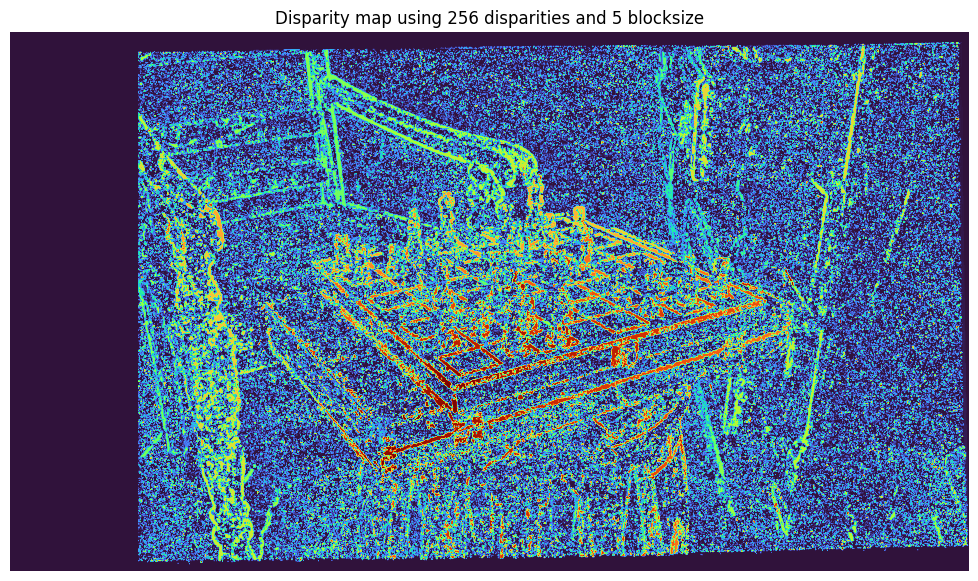

In [12]:
def stereo(numDisparities, blockSize, cmap):
    stereo = cv2.StereoBM_create(numDisparities, blockSize)
    disparity = stereo.compute(left, right)
    plt.figure(figsize=(16, 7))
    plt.imshow(disparity, cmap)
    plt.title(f'Disparity map using {numDisparities} disparities and {blockSize} blocksize')
    plt.axis('off')

    plt.show()

stereo(int_slider_disp.value*16, int_slider_block.value, 'turbo')

##### **Using OpenCV's StereoSGBM**

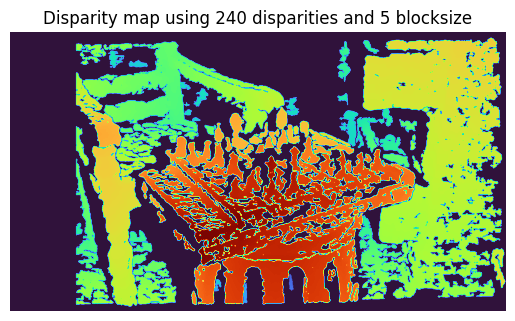

In [14]:
def stereo_sgbm(window_size, num_disp_fact, cmap):
  min_disp = 16
  num_disp = num_disp_fact*16 - min_disp
  stereo = cv2.StereoSGBM_create(minDisparity=min_disp,
                                  numDisparities=num_disp,
                                  blockSize=16,
                                  P1=8 * 3 * window_size ** 2,
                                  P2=32 * 3 * window_size ** 2,
                                  disp12MaxDiff=1,
                                  uniquenessRatio=25,
                                  speckleWindowSize=500,
                                  speckleRange=32
                                  )

  disp = stereo.compute(left, right).astype(np.float32) / 16.0
  plt.imshow(disp,cmap)
  plt.axis('off')
  plt.title(f'Disparity map using {num_disp} disparities and {window_size} blocksize')

  plt.show()


stereo_sgbm(int_slider_block.value, int_slider_disp.value, 'turbo')

Question: Comment on what parameters were the most important to be tuned and the quality of the output (visual quality) that you observe.



**ANSWER**

In both cases, the important parameters were the number of disparities and the size of the blocks (for stereo) and window (for stereo_sgbm).

It's important to note that the number of disparities must be a multiple of 16. For stereo, the block size in stereoBM must be an odd number ranging from 5 to 255.

**Conclusion: StereoSGBM is better than StereoBM** <br>
StereoSGBM outperforms StereoBM due to its comprehensive perspective. It performs well in textureless and occluded areas, providing more accurate representations. It also preserves edges effectively and offers parameters for precise adjustments. Although slightly slower due to the added computations, it provides more accuracy

Some other references

- General unformal : https://lookingglassfactory.com/blog/depth-map
- Block matching : https://en.wikipedia.org/wiki/Block-matching_algorithm
- Stereo BM: three-step search algo : https://www.digitalxplore.org/up_proc/pdf/62-1397565973101-104.pdf and https://www.sciencedirect.com/science/article/pii/S1877050915007346
- Stereo SGBM: Semi-Global Matching : https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.88.8897&rep=rep1&type=pdf

If you are interested then you may check the other algorithm you did choose and see the initial results to comment on how the time and the final output differ from the one you chose

<h2> MONOCULAR DEPTH ESTIMATION USING A DNN (Deep Neural Network)<h2>

There are a lot of DNN for creating a depth map using only one image. I suggest you try :
- MiDaS https://github.com/isl-org/MiDaS
- MonoDepth2 : https://github.com/nianticlabs/monodepth2


You can also choose another DNN if you want.
To use them, simply clone the git repository and use the model (there are different models for different results in MiDaS for example). You don't have to retrain the model. All instructions are in the git.
You only need one image as an input.

**1. DNN1 - MiDaS**

Cloning Github repo

In [18]:
!git clone https://github.com/isl-org/MiDaS.git

Cloning into 'MiDaS'...
remote: Enumerating objects: 618, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 618 (delta 143), reused 98 (delta 98), pack-reused 423
Receiving objects: 100% (618/618), 3.44 MiB | 25.54 MiB/s, done.
Resolving deltas: 100% (244/244), done.


Installing Dependency

In [ ]:
!pip install timm==0.6.12

Loading model weights from drive and copying to appropriate folder

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!cp /content/drive/MyDrive/dpt_swin2_large_384.pt /content/MiDaS/weights/

Copying test images to appropriate folder

In [22]:
!cp /content/test_1.png /content/MiDaS/input/
!cp /content/test_2.png /content/MiDaS/input/

Changing current directory

In [23]:
%cd MiDaS

/content/MiDaS


Calling Script to obtain depth map

In [24]:
!python run.py --model_type=dpt_swin2_large_384 --input_path='input' --output_path='output'

Initialize
Device: cuda
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model loaded, number of parameters = 213M
Start processing
  Processing input/test_1.png (1/2)
    Input resized to 384x384 before entering the encoder
  Processing input/test_2.png (2/2)
    Input resized to 384x384 before entering the encoder
Finished


Visualizing Obtained Depth Maps

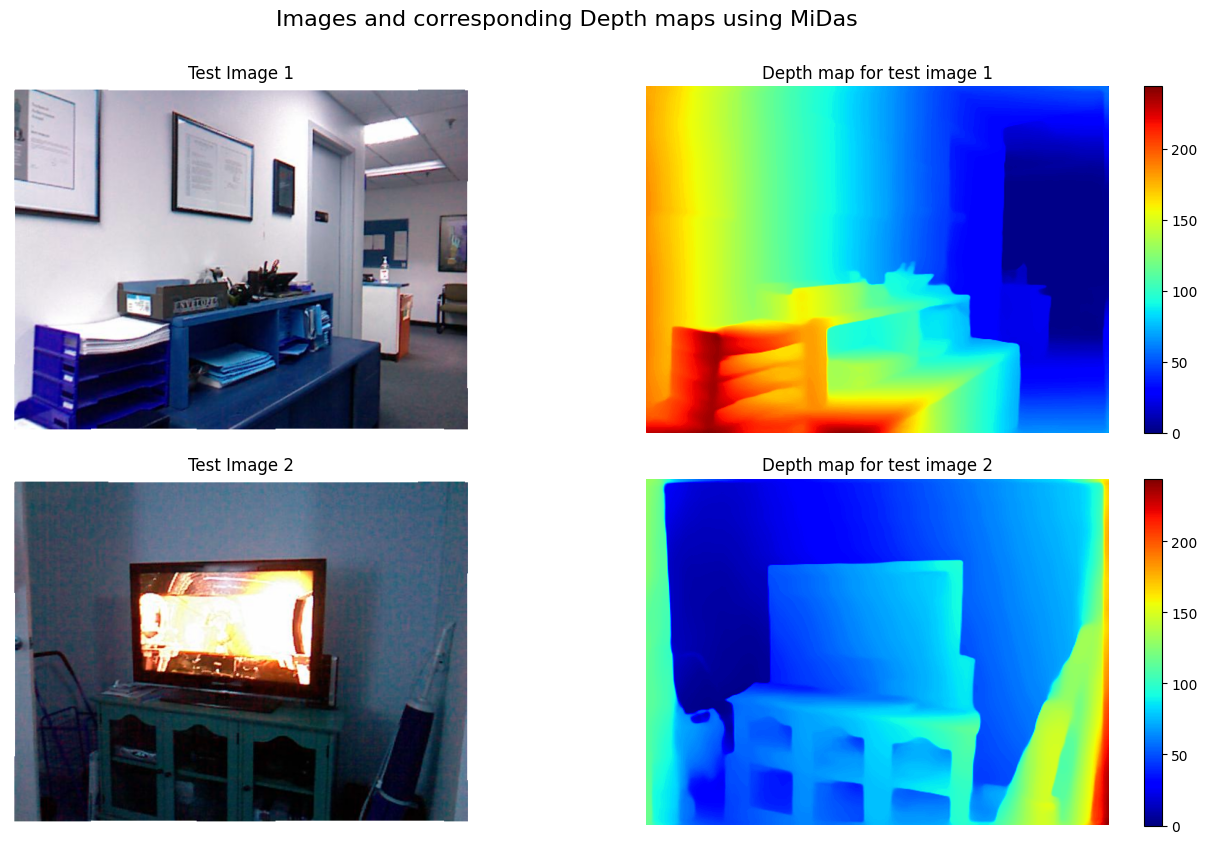

In [25]:
test_1 = cv2.imread('/content/test_1.png') #Reading test image 1
test_2 = cv2.imread('/content/test_2.png') #Reading test image 2

output_1 = cv2.imread('/content/MiDaS/output/test_1-dpt_swin2_large_384.png') #Reading obtained depth map image
output_2 = cv2.imread('/content/MiDaS/output/test_2-dpt_swin2_large_384.png') #Reading obtained depth map image

output_1_gray = cv2.cvtColor(output_1, cv2.COLOR_BGR2GRAY) #Converting to grayscale
output_2_gray = cv2.cvtColor(output_2, cv2.COLOR_BGR2GRAY) #Converting to grayscale

images = [test_1, test_2]
outputs = [output_1_gray, output_2_gray]
titles = ['Depth map for test image 1', 'Depth map for test image 2']

plt.figure(figsize=(14, 8))
for i in range(2):
  # Subplot for Test Image
  plt.subplot(2, 2, 2 * i + 1)
  plt.imshow(images[i], cmap='jet')  # Display the first image
  plt.axis('off')
  plt.title(f'Test Image {i+1}')

  # Subplot for Depth maps
  plt.subplot(2, 2, 2 * i + 2)
  plt.imshow(outputs[i], cmap='jet')
  plt.axis('off')
  plt.colorbar()
  plt.title(titles[i])

plt.tight_layout()
plt.suptitle('Images and corresponding Depth maps using MiDas', fontsize=16, y=1.05)
plt.show()

**ANSWER**

From the plots above, it is observed that depth images are correct for both images as the shelf and books in image 1 which are the closest to the camera are the hottest and have the most value in the depth map, with the same observed in image 2 where the wall is the closest to the camera and has the hottest area in the depth map, followed by the bottom of the vacuum cleaner which is the second closest to the camera and then the middle to top of the cleaner. It is seen that the model outputs are not only sensitive to horizontal distance but vertical distances as well. Finally, it should also be mentioned that the values in the depth maps obtained are in descending order from objects closet to the camera to objects farthest from the camera (i,e closer objects have a higher depth map value than further obejcts), and it should be noted that this convention is not used all the time as large popular depthmap datasets often use the inverse convention with objects values going in ascending order as the distance to the camera increases (closer objects have a lower depth value than farther ones).

This is demsontrated below using the Groundtruth data for test image 1 from the [NYU Depth V2 dataset](https://www.kaggle.com/datasets/soumikrakshit/nyu-depth-v2/).

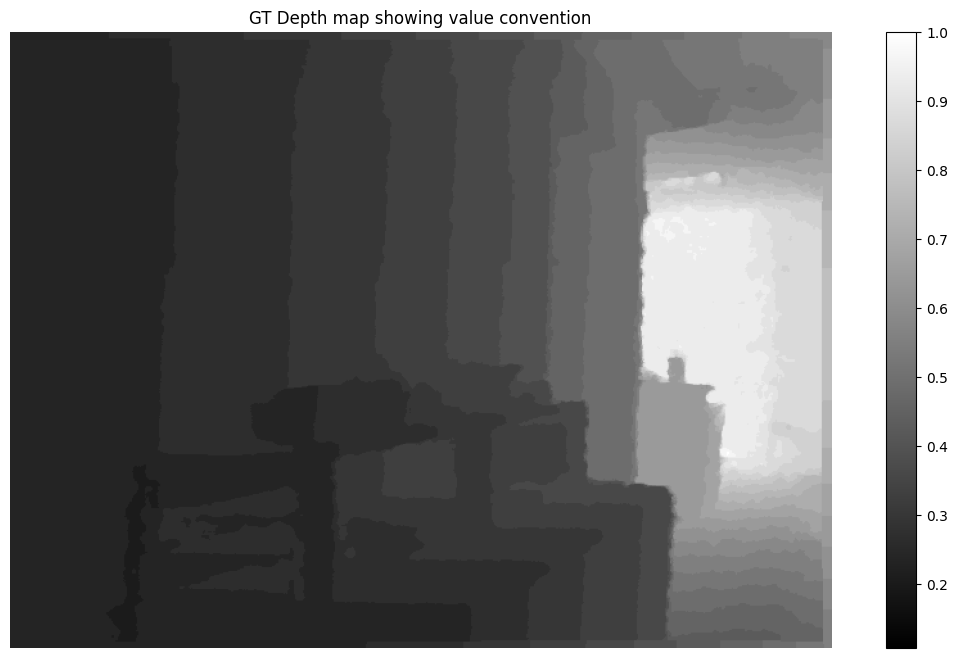

In [39]:
test_1_gt = cv2.imread('/content/test_1_depth.png')

test_1_gt = normalise(test_1_gt)

plt.figure(figsize=(14, 8))

plt.imshow(test_1_gt, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('GT Depth map showing value convention')

plt.show()

**2. DNN2 - MonoDepth2**

Cloning Github repo

In [26]:
!git clone https://github.com/nianticlabs/monodepth2.git

Cloning into 'monodepth2'...
remote: Enumerating objects: 180, done.
remote: Total 180 (delta 0), reused 0 (delta 0), pack-reused 180
Receiving objects: 100% (180/180), 10.27 MiB | 29.62 MiB/s, done.
Resolving deltas: 100% (89/89), done.


Calling Script to obtain depth map

In [27]:
!python monodepth2/test_simple.py --image_path /content/test_1.png --model_name mono+stereo_640x192
!python monodepth2/test_simple.py --image_path /content/test_2.png --model_name mono+stereo_640x192

-> Downloading pretrained model to models/mono+stereo_640x192.zip
   Unzipping model...
   Model unzipped to models/mono+stereo_640x192
-> Loading model from  models/mono+stereo_640x192
   Loading pretrained encoder
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
   Loading pretrained decoder
-> Predicting on 1 test images
   Processed 1 of 1 images - saved predictions to:
   - /content/test_1_disp.jpeg
   - /content/test_1_disp.npy
-> Done!
-> Loading model from  models/mono+stereo_640x192
   Loading pretr

Visualizing Obtained Depth Maps

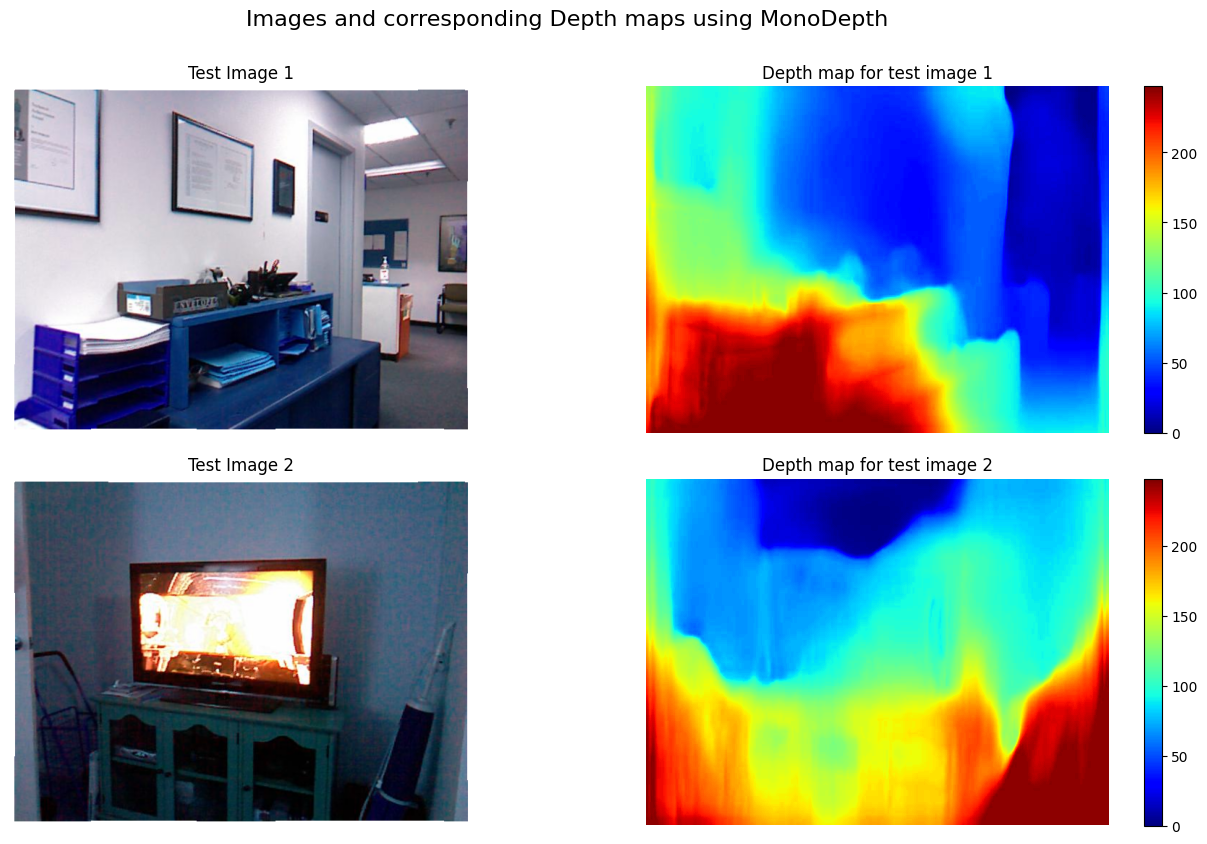

In [28]:
output_1 = cv2.imread('/content/test_1_disp.jpeg')
output_2 = cv2.imread('/content/test_2_disp.jpeg')

output_1_gray = cv2.cvtColor(output_1, cv2.COLOR_BGR2GRAY)
output_2_gray = cv2.cvtColor(output_2, cv2.COLOR_BGR2GRAY)

images = [test_1, test_2]
outputs = [output_1_gray, output_2_gray]
titles = ['Depth map for test image 1', 'Depth map for test image 2']

plt.figure(figsize=(14, 8))
for i in range(2):
  # Subplot for Test Image
  plt.subplot(2, 2, 2 * i + 1)
  plt.imshow(images[i], cmap='jet')  # Display the first image
  plt.axis('off')
  plt.title(f'Test Image {i+1}')

  # Subplot for Depth maps
  plt.subplot(2, 2, 2 * i + 2)
  plt.imshow(outputs[i], cmap='jet')
  plt.axis('off')
  plt.colorbar()
  plt.title(titles[i])

plt.tight_layout()
plt.suptitle('Images and corresponding Depth maps using MonoDepth', fontsize=16, y=1.05)
plt.show()

**COMMENT**

From the plots above, it is observed that depth images also not only considers horizontal distance, but vertical distance as well because in figure 1, the region of the book directly on the shelf is hotter than the books stacked on each other, the same can also slightly be observed in Figure 2 with the vacuum cleaner.

**Comparing Depth Map images of both DNN models**

By observing both sets of obtained depth maps, the results will be compared on the following basis:
1. Shape preservation: <br> Here the MiDas model preserves the of the objects in its depth maps, while the Monodepth model introduces distortions leading to a not so good representation of objects in the scene.

2. Edge retention: <br> Here the MiDas model preserves the edges and boundaries of the objects in its depth maps, while the Monodepth model completely does not.

3. Object segmentation: <br> Here the MiDas model segments the different objects present in the scene (to an extent) in its depth maps, while the Monodepth model completely does not.

References

- https://paperswithcode.com/task/monocular-depth-estimation